In [116]:
%run constants.ipynb
import numpy as np
import matplotlib.pyplot as plt

In [117]:
x_values = []
y_values = []
z_values = []
with open('n=4_coords', 'r') as file:
    for line in file:
        # Split each line by comma and convert to integers
        x, y, z = map(int, line.strip().split(','))
        x_values.append(x)
        y_values.append(y)
        z_values.append(z)

# Write the x and y values as two giant lines
with open('n=4_coordsb', 'w') as file:
    # Write x values on the first line
    file.write(','.join(map(str, x_values)) + '\n')
    
    # Write y values on the second line
    file.write(','.join(map(str, y_values)) + '\n')
    file.write(','.join(map(str, z_values)) + '\n')

In [121]:
def read(n):
    with open(f'n={n}_coords_f') as fp:
        lines = fp.readlines()
        lines = [tuple(line.strip().split(',')) for line in lines]
        lines = [(int(x), int(y), float(fval), int(z)) for x,y,fval,z in lines]
    return zip(*lines)  # unzip into parallel lists

In [159]:
XYZ_SUM=2000

In [233]:
xs, ys, fvals, _ = tuple(read(3))

In [234]:
from collections import Counter
Counter(fvals)

Counter({0.08055555555555555: 4081,
         0.13148148148148145: 10528,
         0.15925925925925924: 5571,
         0.16851851851851848: 3610,
         0.17777777777777778: 5671,
         0.18703703703703703: 5901,
         0.19166666666666668: 9266,
         0.19629629629629627: 18706,
         0.22407407407407406: 3239,
         0.23796296296296296: 22004,
         0.2425925925925926: 17339,
         0.03888888888888889: 6937,
         0.10833333333333331: 9934,
         0.15462962962962964: 2372,
         0.1638888888888889: 4744,
         0.17314814814814813: 2957,
         0.18240740740740738: 1021,
         0.23333333333333336: 5925,
         0.03425925925925927: 14595,
         0.048148148148148134: 6747,
         0.20092592592592592: 3975,
         0.052777777777777785: 8931,
         0.22870370370370371: 5334,
         0.04351851851851851: 14451,
         0.21944444444444447: 6800,
         0.21481481481481482: 2065,
         0.21018518518518517: 5941,
         0.11296296296

In [235]:
sorted({1:2,3:-1,2:3})

[1, 2, 3]

In [230]:
from matplotlib.colors import Normalize, LogNorm, ListedColormap, BoundaryNorm

def subplot_f(n, ax=None):
    xs, ys, fvals, _ = tuple(read(n))
#     norm = LogNorm(vmin=np.min(fvals), vmax=np.max(fvals))

    # color map
    fval_counts = Counter(fvals)
    base_cmap = plt.get_cmap('GnBu')
    cmap = ListedColormap(base_cmap(np.linspace(0,1, len(fval_counts))))
    norm = BoundaryNorm(sorted(list(fval_counts.keys())), cmap.N)
    scatter = ax.scatter(xs, ys, 
                         c=fvals, cmap=cmap, norm=norm,
                         s=30)
    # x<y boundary
    xlim = (1, XYZ_SUM//3)
    ylim = (1, XYZ_SUM//2)
    annotate_pos = 5*len(ys) // 6
    boundary, = ax.plot(np.linspace(*ylim), np.linspace(*ylim), 
                       linestyle='--', color='red', label='x=y')
    ax.annotate('x=y', fontsize=12, color='red', 
               xy=(ys[annotate_pos]-20, ys[annotate_pos]+70))
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'n={n}')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    ax.grid(visible=True)
    ax.set_aspect(0.6)
    
    return scatter

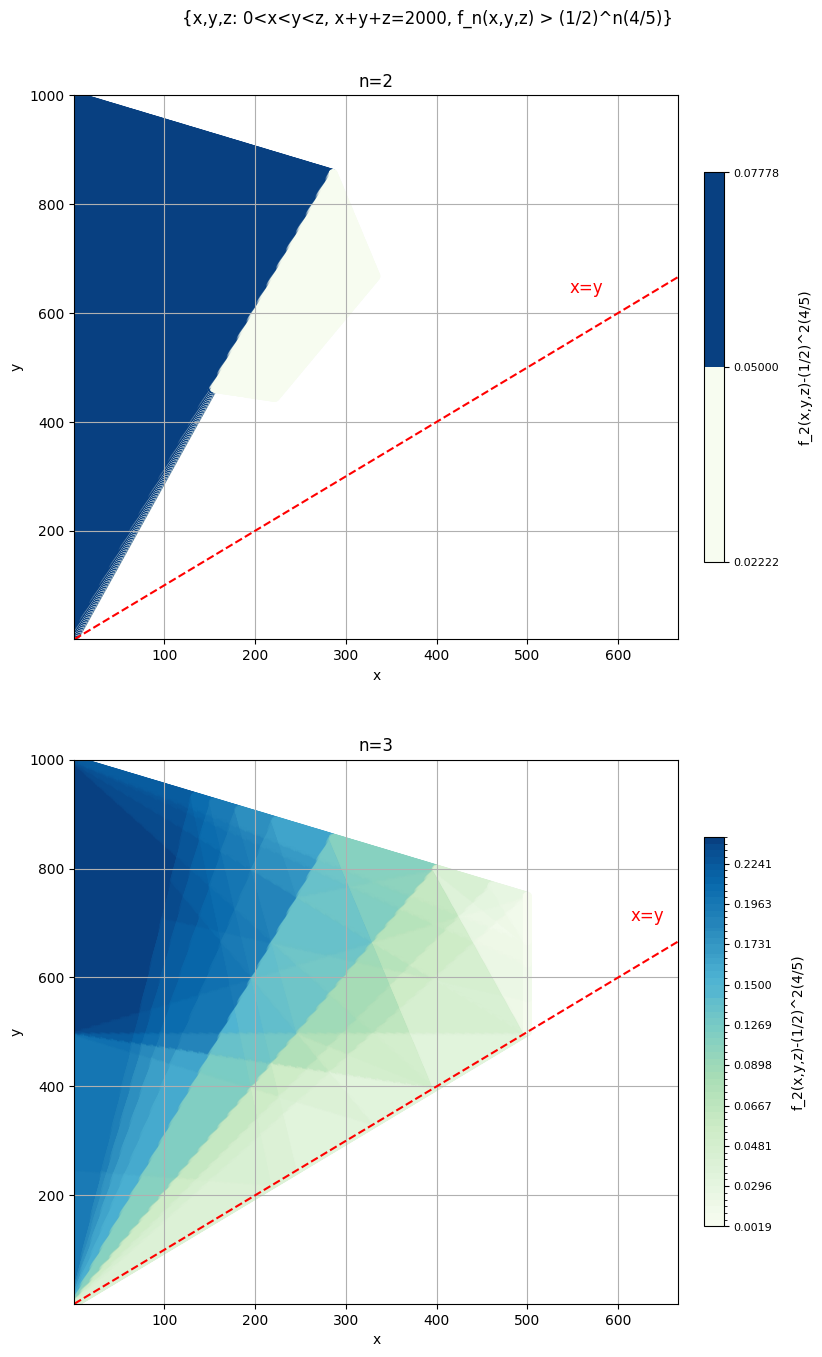

In [236]:
fig, axs = plt.subplots(2,1, figsize=(8,14))
ns = [2,3,4]
cbar_label = f'f_{n}(x,y,z)-(1/2)^{n}(4/5)'

for i in range(2):
    scatter = subplot_f(ns[i], ax=axs[i])
    # color bar based on f_n(x,y,z) - thresh(n) values
    cbar = fig.colorbar(scatter, ax=axs[i], 
                       fraction=0.03, pad=0.04)
    cbar.ax.tick_params(labelsize=8)
    cbar.set_label(cbar_label, labelpad=14)
# subplot_f(4, ax=axs[1])
plt.tight_layout(rect=[0, 0, 1, 0.96])

# fig.legend(scatters, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05))

plt.suptitle('{x,y,z: 0<x<y<z, x+y+z=2000, f_n(x,y,z) > (1/2)^n(4/5)}')
fig.savefig('f_n(x,y,z)-thresh(n).png', 
            dpi=300, bbox_inches='tight')
plt.show()